<a href="https://colab.research.google.com/github/ramrajv/Advanced_Linear_Regression_Assignment/blob/main/Adv_Lin_Reg_Assignment_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study
1. US based Surprise Housing wants to predict actual value of prospective properties to decide whether to invest in them.
2. The company wants to know: -

  >a. Which variables are significant.

  >b. How well those variables describe the price.

# Exploratory Data Analysis

## Import Libraries and read data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/ramrajv/AdvLogReg_Assignment/main/train.csv'
df = pd.read_csv(url)

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Null Value Treatment

In [5]:
# Get null values percentage

null_counts = df.isna().sum()/df.shape[0]*100
null_counts[null_counts>50]

Alley          93.767123
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [6]:
# Remove fields with null values more than 50%

dropcols = null_counts[null_counts>50].index
df.drop(dropcols, axis = 1, inplace = True)

In [7]:
# Get columns with null values

null_counts = df.isna().sum()/df.shape[0]*100
null_counts[null_counts>0]

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

In [8]:
nullcols = null_counts[null_counts>0].index.tolist()
df[nullcols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrType    1452 non-null   object 
 2   MasVnrArea    1452 non-null   float64
 3   BsmtQual      1423 non-null   object 
 4   BsmtCond      1423 non-null   object 
 5   BsmtExposure  1422 non-null   object 
 6   BsmtFinType1  1423 non-null   object 
 7   BsmtFinType2  1422 non-null   object 
 8   Electrical    1459 non-null   object 
 9   FireplaceQu   770 non-null    object 
 10  GarageType    1379 non-null   object 
 11  GarageYrBlt   1379 non-null   float64
 12  GarageFinish  1379 non-null   object 
 13  GarageQual    1379 non-null   object 
 14  GarageCond    1379 non-null   object 
dtypes: float64(3), object(12)
memory usage: 171.2+ KB


In [9]:
numcols = df[nullcols].columns[df[nullcols].dtypes!='O'].tolist()
objcols = df[nullcols].columns[df[nullcols].dtypes=='O'].tolist()

In [10]:
df[objcols]=df[objcols].fillna(df.mode().iloc[0])

In [11]:
df[numcols]=df[numcols].fillna(value = df[numcols].mean())

In [12]:
nullcounts = df.isna().sum()/df.shape[0]*100
nullcounts[nullcounts>0]

Series([], dtype: float64)

#### Check for types of variables.

We will be checking each variable for its type. Some variables could be having numbers and actually represent categories. These need to be identified and changed to categorical variables.

In [13]:
# Get count of distinct values in numerical columns

nobj = df.columns[df.dtypes!='O']
df[nobj].nunique().sort_values()

BsmtHalfBath        3
HalfBath            3
FullBath            4
BsmtFullBath        4
Fireplaces          4
KitchenAbvGr        4
GarageCars          5
YrSold              5
BedroomAbvGr        8
PoolArea            8
OverallCond         9
OverallQual        10
TotRmsAbvGrd       12
MoSold             12
MSSubClass         15
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
YearRemodAdd       61
ScreenPorch        76
GarageYrBlt        98
LotFrontage       111
YearBuilt         112
EnclosedPorch     120
BsmtFinSF2        144
OpenPorchSF       202
WoodDeckSF        274
MasVnrArea        328
2ndFlrSF          417
GarageArea        441
BsmtFinSF1        637
SalePrice         663
TotalBsmtSF       721
1stFlrSF          753
BsmtUnfSF         780
GrLivArea         861
LotArea          1073
Id               1460
dtype: int64

Convert numerical categorical to object type

In [14]:
df['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [15]:
df.loc[:,'MSSubClass'] = df['MSSubClass'].astype(str) + 'MSS'

## Date time treatment

In [16]:
df['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6])

In [17]:
df.loc[:,'MoSold'] = df['MoSold'].astype(str)
df.loc[df['MoSold'].str.len()<2,'MoSold'] = '0' + df['MoSold']

In [18]:
df['MoSold']

0       02
1       05
2       09
3       02
4       12
        ..
1455    08
1456    02
1457    05
1458    04
1459    06
Name: MoSold, Length: 1460, dtype: object

In [19]:
df.loc[:,'DateSold'] = pd.to_datetime('01-'+df['MoSold'] +'-'+ df['YrSold'].astype(str))

In [20]:
df['DateSold']

0      2008-01-02
1      2007-01-05
2      2008-01-09
3      2006-01-02
4      2008-01-12
          ...    
1455   2007-01-08
1456   2010-01-02
1457   2010-01-05
1458   2010-01-04
1459   2008-01-06
Name: DateSold, Length: 1460, dtype: datetime64[ns]

In [21]:
df.drop(['MoSold','YrSold'], axis = 1, inplace = True)

## Convert Variables

In [22]:
df['YearRemodAdd'].unique()

array([2003, 1976, 2002, 1970, 2000, 1995, 2005, 1973, 1950, 1965, 2006,
       1962, 2007, 1960, 2001, 1967, 2004, 2008, 1997, 1959, 1990, 1955,
       1983, 1980, 1966, 1963, 1987, 1964, 1972, 1996, 1998, 1989, 1953,
       1956, 1968, 1981, 1992, 2009, 1982, 1961, 1993, 1999, 1985, 1979,
       1977, 1969, 1958, 1991, 1971, 1952, 1975, 2010, 1984, 1986, 1994,
       1988, 1954, 1957, 1951, 1978, 1974])

In [23]:
df['YearRemodAdd'].max()

2010

In [24]:
# Convert year remod to age

df.loc[:,'YearRemodAdd'] = 2020 - df['YearRemodAdd']

In [25]:
df['GarageYrBlt'].max()

2010.0

In [26]:
df.loc[:,'GarageYrBlt'] = 2020 - df['GarageYrBlt']

In [27]:
df['YearBuilt'].max()

2010

In [28]:
df.loc[:,'YearBuilt'] = 2020 - df['YearBuilt']

In [29]:
df.rename(columns = {'YearBuilt':'Age','YearRemodAdd':'AgeRemod','GarageYrBlt':'AgeGarage'}, inplace=True)

## Outlier treatment of target variable

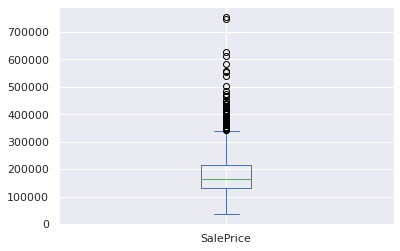

In [30]:
df['SalePrice'].plot.box()

In [31]:
from scipy.stats import zscore     # import zscore library

# calculate zscore of saleprice column
# make a copy of original dataframe
# remove rows having zscore value of sale price three or more
# drop calculated zscore column from dataframe

df.loc[:,'spz'] = np.abs(zscore(df['SalePrice']))
df_corr = df.copy()
df = df[df['spz']<3]
df.drop('spz', axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1438 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             1438 non-null   int64         
 1   MSSubClass     1438 non-null   object        
 2   MSZoning       1438 non-null   object        
 3   LotFrontage    1438 non-null   float64       
 4   LotArea        1438 non-null   int64         
 5   Street         1438 non-null   object        
 6   LotShape       1438 non-null   object        
 7   LandContour    1438 non-null   object        
 8   Utilities      1438 non-null   object        
 9   LotConfig      1438 non-null   object        
 10  LandSlope      1438 non-null   object        
 11  Neighborhood   1438 non-null   object        
 12  Condition1     1438 non-null   object        
 13  Condition2     1438 non-null   object        
 14  BldgType       1438 non-null   object        
 15  HouseStyle     1438 n

## Drop object columns with high skew

In [33]:
# Get percentage of frequency for categorical variables.

obj = df.columns[df.dtypes=='O']
obj_desc = df[obj].describe().T
obj_desc['pc'] = obj_desc['freq']/ obj_desc['count']
dropcols = obj_desc[obj_desc['pc']>=0.9].index
dropcols

Index(['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl',
       'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'Functional',
       'GarageQual', 'GarageCond', 'PavedDrive'],
      dtype='object')

In [34]:
# Drop columns with high skew

df.drop(dropcols, axis = 1, inplace = True)

## Business Metrics
1. Calculate rate per squarefeet.
2. Get ratio of length and width of lot.

In [35]:
# Price per squarefeet.

df.loc[:,'PriceperSft'] = df['LotArea']/df['SalePrice']

# Ratio of length and width of lot.

df.loc[:, 'LWRatio'] = df['LotFrontage']/(df['LotArea']/df['LotFrontage'])

## Skewed columns identification

In [36]:
df.shape

(1438, 65)

In [37]:
obj = df.columns[df.dtypes=='O']
nobj = df.columns[df.dtypes!='O']
obj

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'SaleType', 'SaleCondition'],
      dtype='object')

In [38]:
nobj = nobj.drop(['Id','SalePrice'])

In [39]:
nobj

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'Age',
       'AgeRemod', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'AgeGarage', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'DateSold', 'PriceperSft',
       'LWRatio'],
      dtype='object')

In [40]:
nobj_desc = df[nobj].describe().T

In [41]:
nobj_desc

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1438.0,69.766926,21.835192,21.000000,60.000000,70.049958,78.000000,313.000000
LotArea,1438.0,10401.338665,9945.341842,1300.000000,7500.000000,9400.000000,11441.000000,215245.000000
OverallQual,1438.0,6.051460,1.334253,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1438.0,5.580668,1.115508,1.000000,5.000000,5.000000,6.000000,9.000000
Age,1438.0,49.155076,30.093041,10.000000,20.000000,48.000000,66.750000,148.000000
AgeRemod,1438.0,35.429068,20.652378,10.000000,16.000000,27.000000,54.000000,70.000000
MasVnrArea,1438.0,97.855213,168.641356,0.000000,0.000000,0.000000,157.750000,1600.000000
BsmtFinSF1,1438.0,432.394298,442.679193,0.000000,0.000000,378.000000,698.750000,5644.000000
BsmtFinSF2,1438.0,46.886648,161.931424,0.000000,0.000000,0.000000,0.000000,1474.000000
BsmtUnfSF,1438.0,563.477051,437.932130,0.000000,219.250000,475.000000,806.000000,2336.000000


In [42]:
df[nobj].skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


LotFrontage       2.445214
LotArea          12.492275
OverallQual       0.118781
OverallCond       0.665948
Age               0.594878
AgeRemod          0.483091
MasVnrArea        2.575693
BsmtFinSF1        1.741768
BsmtFinSF2        4.246175
BsmtUnfSF         0.906259
TotalBsmtSF       1.505617
1stFlrSF          1.338154
2ndFlrSF          0.760518
LowQualFinSF      9.131154
GrLivArea         1.212964
BsmtFullBath      0.620219
BsmtHalfBath      4.099060
FullBath         -0.022551
HalfBath          0.706305
BedroomAbvGr      0.231567
KitchenAbvGr      4.449593
TotRmsAbvGrd      0.624132
Fireplaces        0.668935
AgeGarage         0.653187
GarageCars       -0.355639
GarageArea        0.149517
WoodDeckSF        1.571425
OpenPorchSF       2.421522
EnclosedPorch     3.073212
3SsnPorch        10.224468
ScreenPorch       4.149834
PoolArea         15.972710
MiscVal          24.292361
PriceperSft       6.384356
LWRatio           5.183321
dtype: float64

In [43]:
nobj_sk = df[nobj].skew()
nobj_sk = nobj_sk[
                  (nobj_sk>=1)|
                  (nobj_sk<=-1)
]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [44]:
nobj_sk

LotFrontage       2.445214
LotArea          12.492275
MasVnrArea        2.575693
BsmtFinSF1        1.741768
BsmtFinSF2        4.246175
TotalBsmtSF       1.505617
1stFlrSF          1.338154
LowQualFinSF      9.131154
GrLivArea         1.212964
BsmtHalfBath      4.099060
KitchenAbvGr      4.449593
WoodDeckSF        1.571425
OpenPorchSF       2.421522
EnclosedPorch     3.073212
3SsnPorch        10.224468
ScreenPorch       4.149834
PoolArea         15.972710
MiscVal          24.292361
PriceperSft       6.384356
LWRatio           5.183321
dtype: float64

In [45]:
# Get continuous variable skewed columns

skew_cols = nobj_sk.index.tolist()

In [46]:
skew_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'PriceperSft',
 'LWRatio']

In [47]:
# Do log correction to skewed columns

chk = abs(np.log(df[skew_cols]).skew())
logcols = chk[(chk<=1)&(chk>=-1)].index.tolist()
balcols = [x for x in skew_cols if x not in logcols]

In [48]:
logcols

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'PriceperSft', 'LWRatio']

In [49]:
balcols   #Balance columns after log correction

['MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [50]:
# Do square root correction to balance columns

chk = abs(np.sqrt(df[balcols]).skew())
sqrtcols = chk[(chk<=1) & (chk>=-1)].index.tolist()
balcols1 = [x for x in balcols if x not in sqrtcols]
balcols1      # balance columns after square root correction

['MasVnrArea',
 'BsmtFinSF2',
 'TotalBsmtSF',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [51]:
sqrtcols

['BsmtFinSF1', 'WoodDeckSF', 'OpenPorchSF']

In [52]:
# Check inverting transformation

chk = pd.DataFrame()
chk[balcols1] = np.where(df[balcols1]==0,0,1/df[balcols1])
skw = chk.skew()
invcols = skw[(skw<=1) & (~skw.isna()) & (skw>=-1)].index.tolist()
balcols2 = [x for x in balcols1 if x not in invcols]
balcols2      # balance columns after invert transformation

['MasVnrArea',
 'BsmtFinSF2',
 'TotalBsmtSF',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [53]:
invcols

[]

In [54]:
# Drop columns with high skew and cannot be transformed.

df1 = df.copy() # Create a copy before dropping columns
df.drop(balcols2, axis = 1, inplace = True)

In [55]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Id              -0.001924
LotFrontage      2.445214
LotArea         12.492275
OverallQual      0.118781
OverallCond      0.665948
Age              0.594878
AgeRemod         0.483091
BsmtFinSF1       1.741768
BsmtUnfSF        0.906259
1stFlrSF         1.338154
2ndFlrSF         0.760518
GrLivArea        1.212964
BsmtFullBath     0.620219
FullBath        -0.022551
HalfBath         0.706305
BedroomAbvGr     0.231567
TotRmsAbvGrd     0.624132
Fireplaces       0.668935
AgeGarage        0.653187
GarageCars      -0.355639
GarageArea       0.149517
WoodDeckSF       1.571425
OpenPorchSF      2.421522
SalePrice        1.001684
PriceperSft      6.384356
LWRatio          5.183321
dtype: float64

## Check effect of different object variables with sale price

In [ ]:
obj = df.columns[df.dtypes=='O']
obj.to_list()

['MSSubClass',
 'MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'SaleType',
 'SaleCondition']

In [ ]:
len(obj)

27

In [ ]:
df[obj].isna().sum()

MSSubClass       0
MSZoning         0
LotShape         0
LandContour      0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
HeatingQC        0
KitchenQual      0
FireplaceQu      0
GarageType       0
GarageFinish     0
SaleType         0
SaleCondition    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

<Figure size 432x288 with 0 Axes>

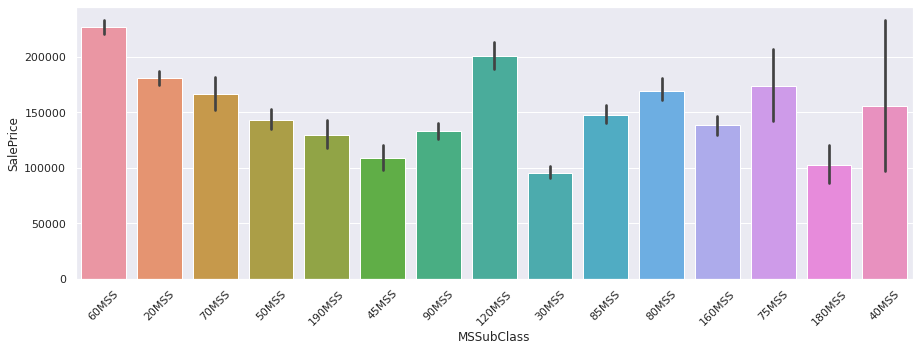

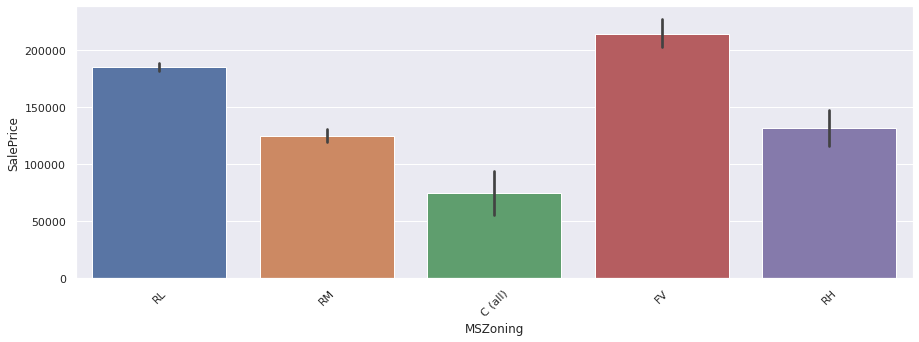

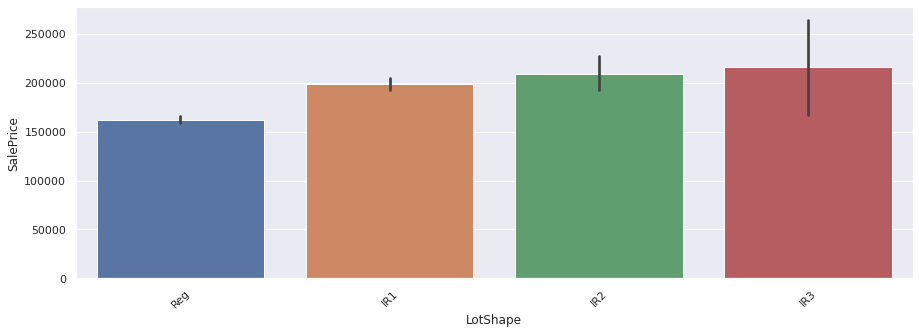

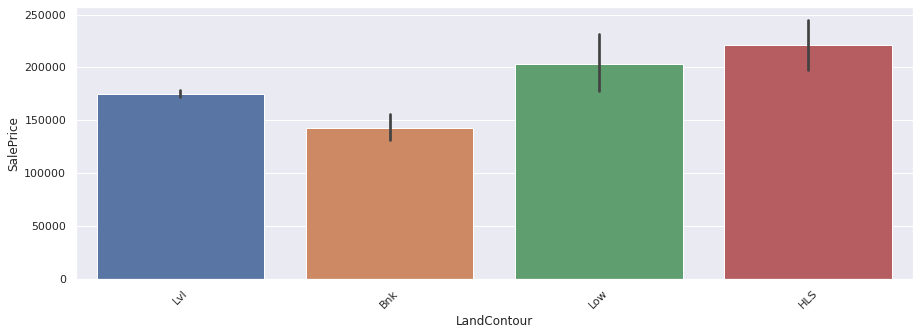

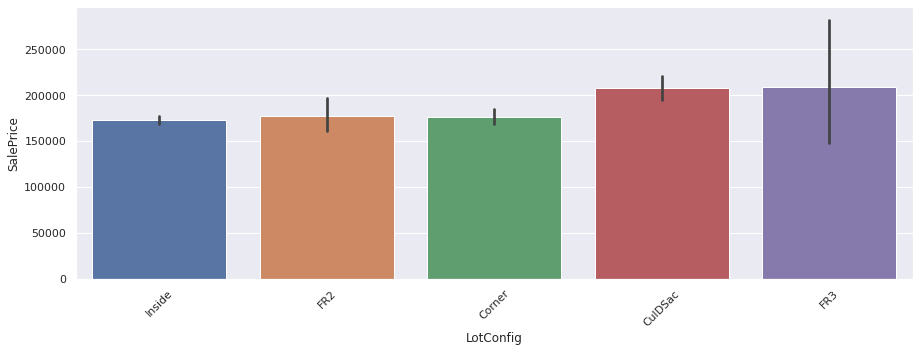

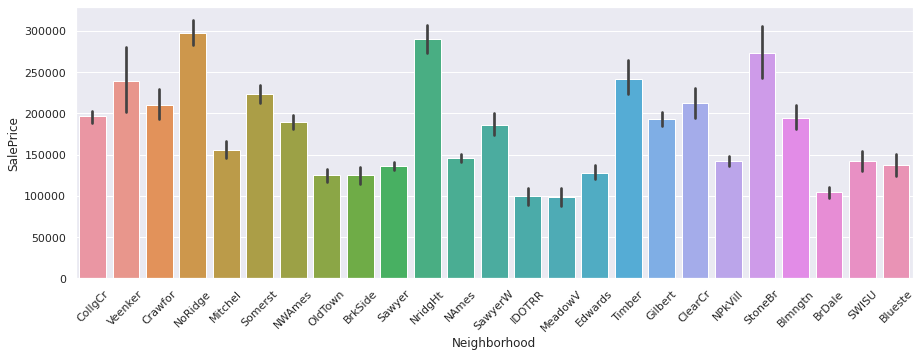

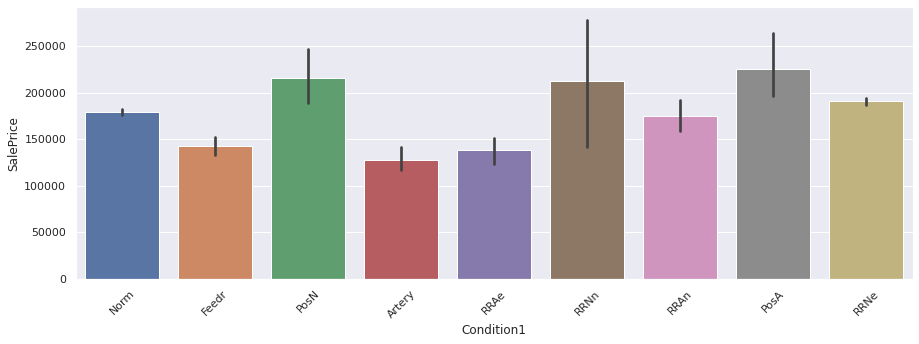

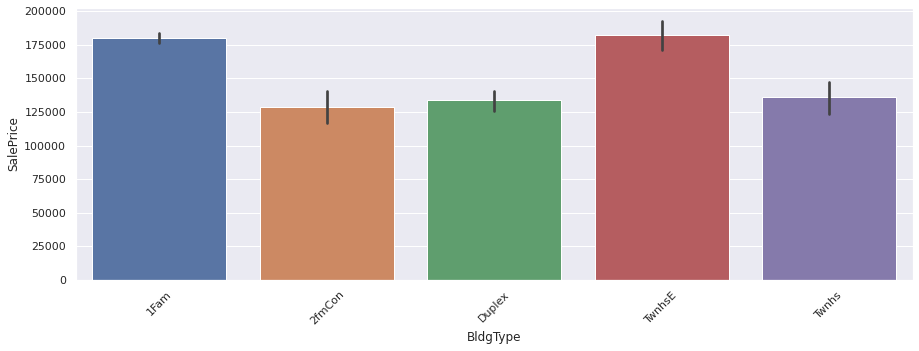

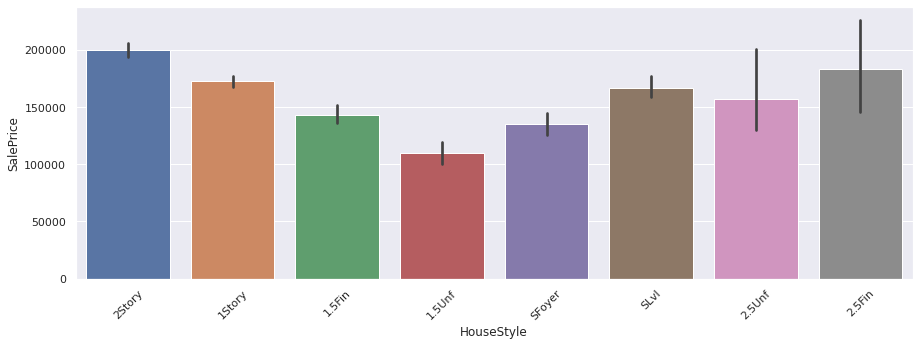

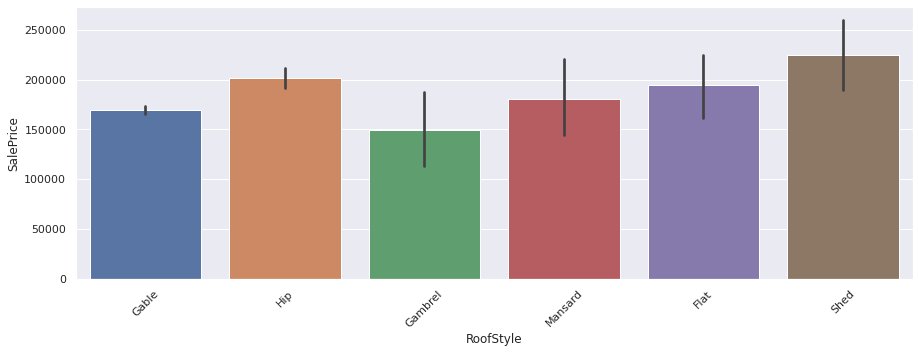

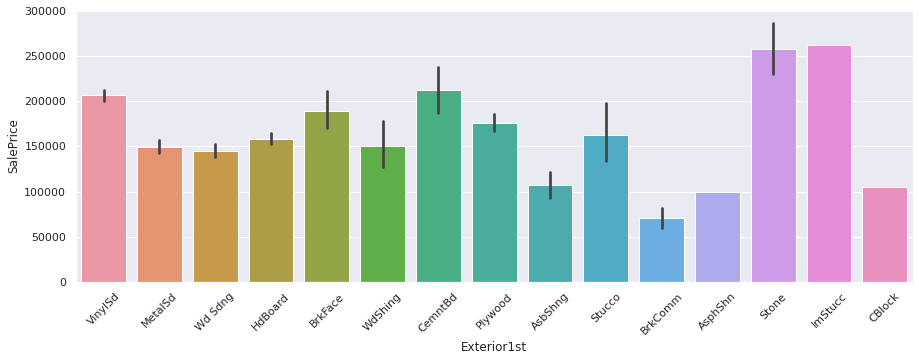

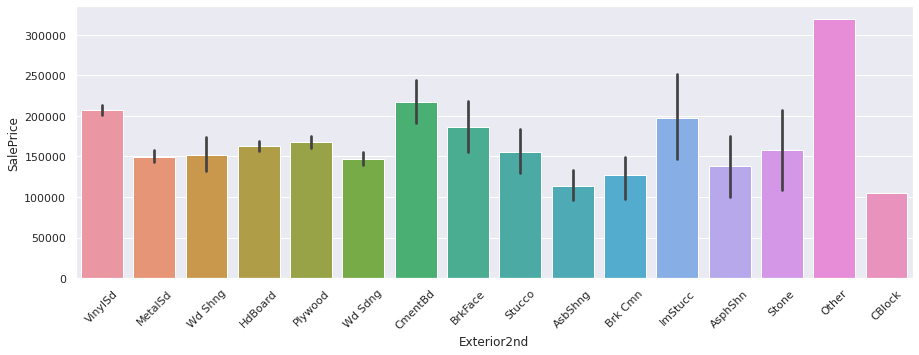

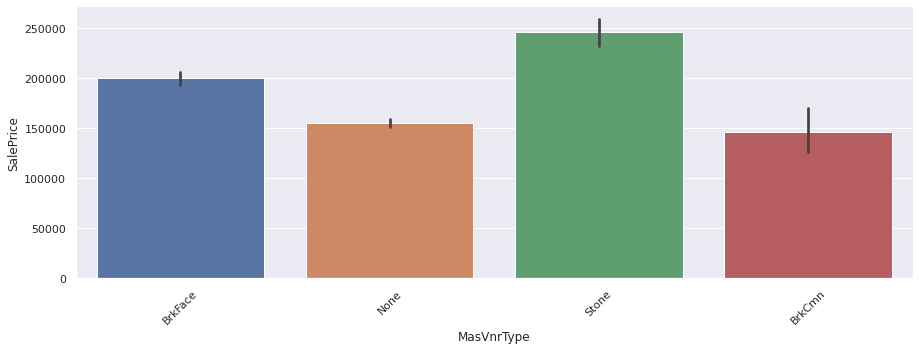

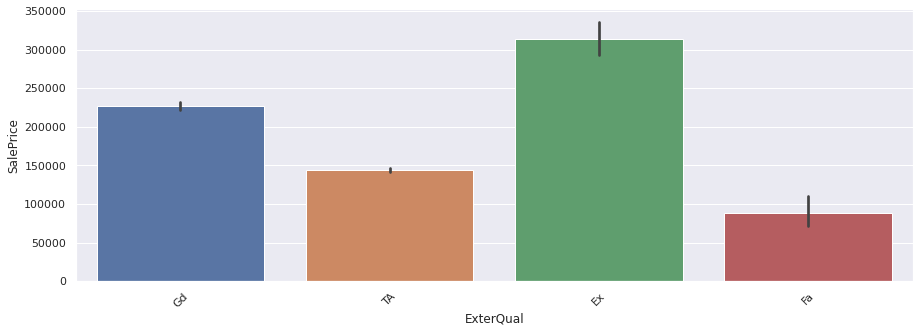

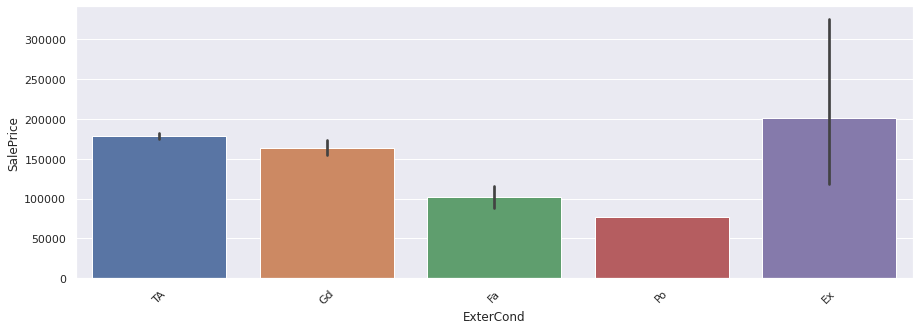

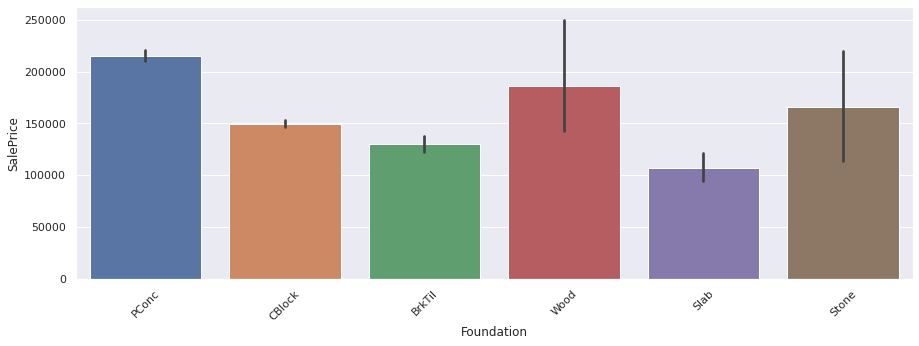

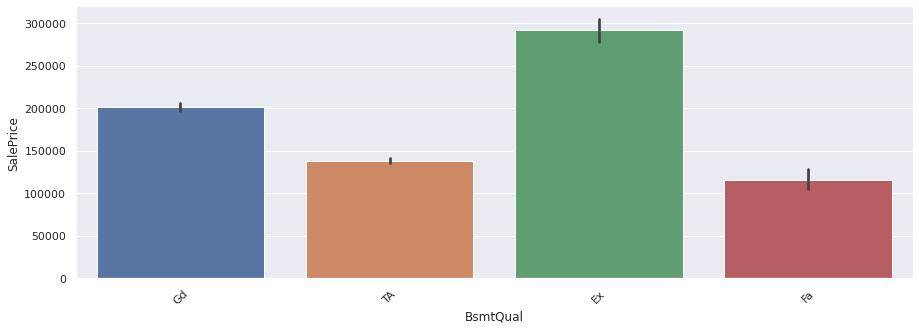

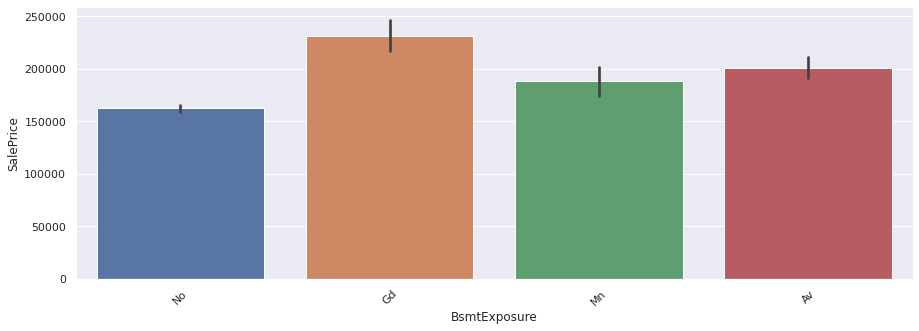

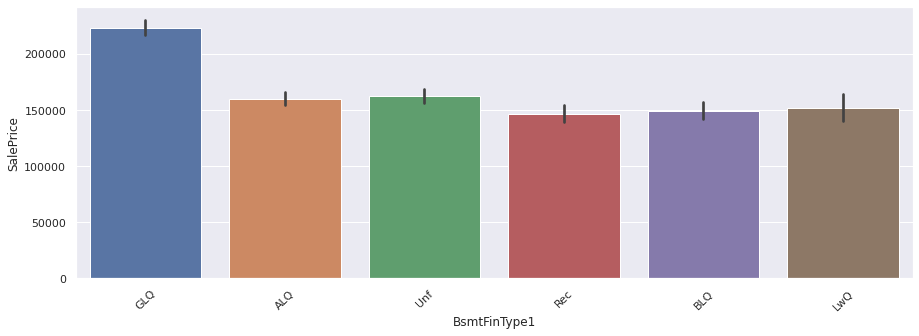

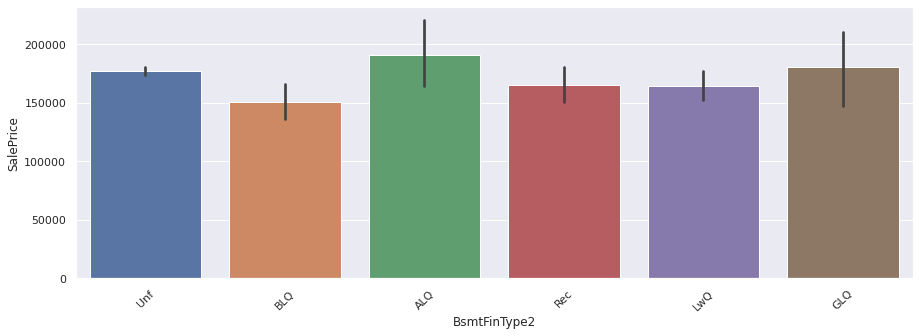

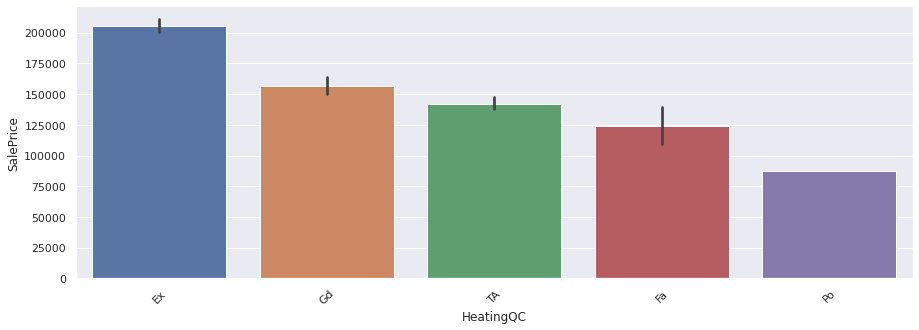

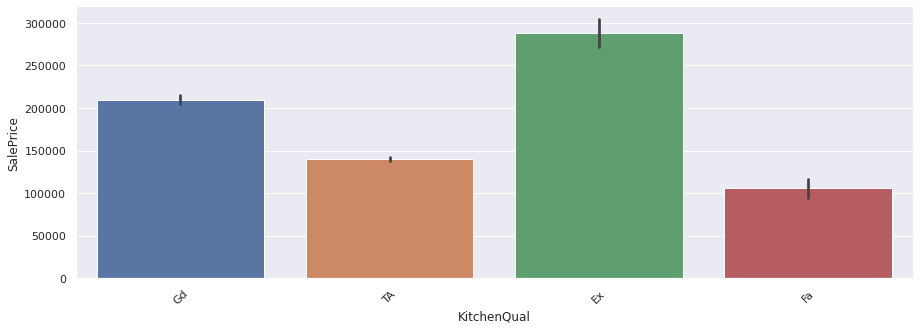

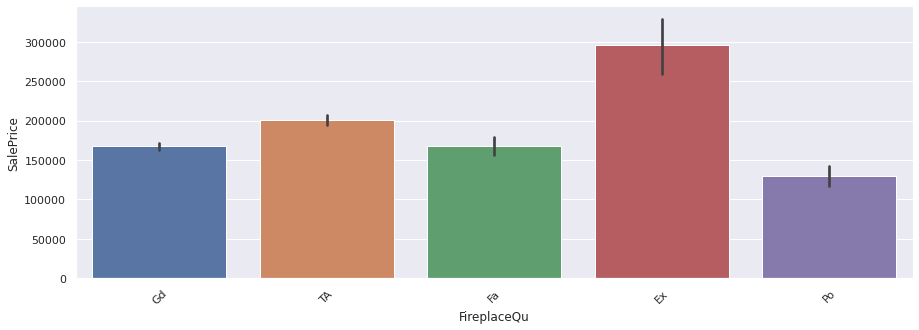

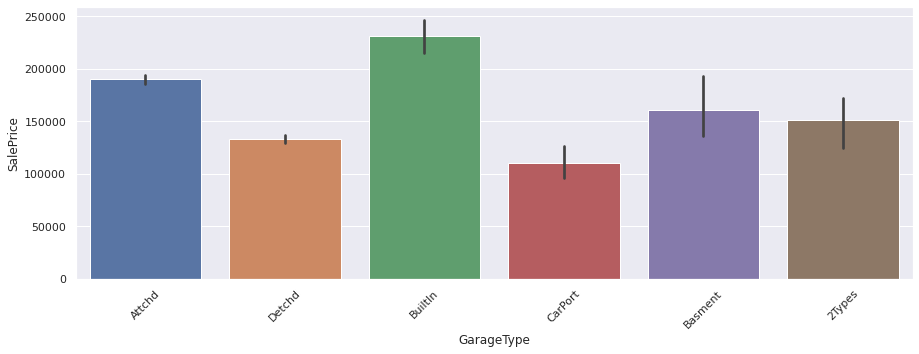

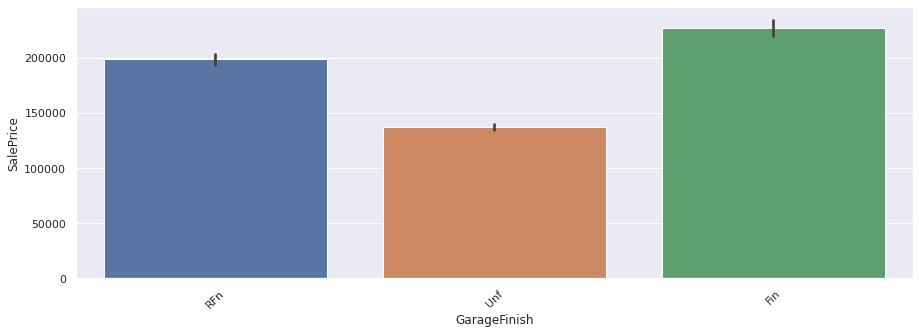

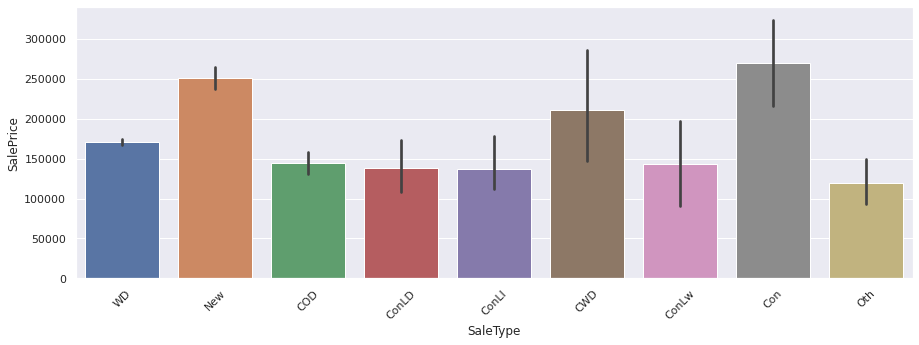

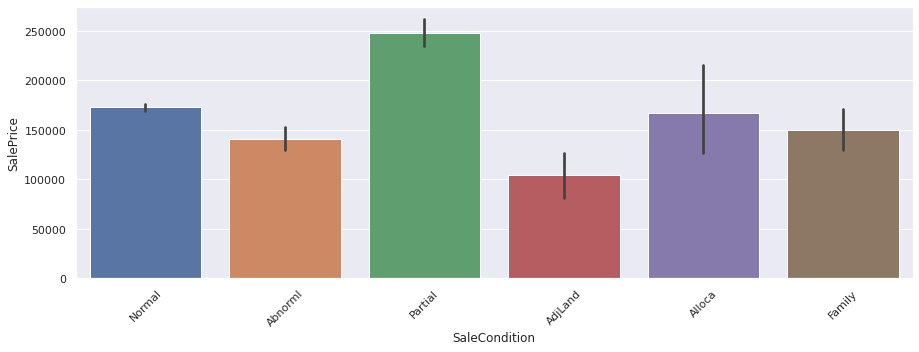

In [ ]:
for i in range(len(obj)):
  x = df[obj[i]]
  y = df['SalePrice']
  plt.figure(i)
  plt.figure(figsize = (15,5))
  plt.xticks(rotation = 45)
  sns.barplot(x=x,y=y,data = df)

### Observations
Highest sale prices have the following characteristics: -
1. 2 story buildings built after 1946.
2. Floating Village type zoning.
3. Irregular 3 type lot shape.
4. Hillside with significant slope.
5. Frontage with 3 sides of property.
6. Northridge neighbourhood.
7. Within 200' of North-South railroad.
8. Townhouse End unit.
9. Shed type roof style.
10. Stone type exterior and masonry veneer.
11. Excellent quality exterior, basement, heating, kitchen and fireplace.
12. Poured concrete type foundation.
13. Good exposure of basement.
14. Good living quarter for basement finished area and average living quarters for second basement.
15. Garage built-in part of the house.
16. Contract sale type with 15% down payment, followed by new condition house.
17. Partially built house.

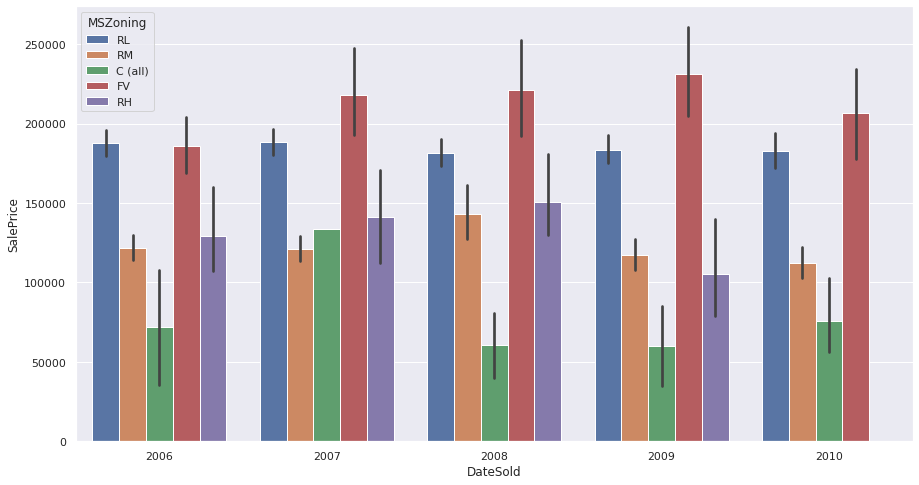

In [ ]:
# Plot sale price against year sold

plt.figure(figsize = (15,8))
x = df['DateSold'].dt.year
y = df['SalePrice']
sns.barplot(x = x, y = y, data = df, hue = 'MSZoning')

In [ ]:
df.groupby(df['DateSold'].dt.year)['SalePrice'].sum().sort_values()

DateSold
2010    29894236
2008    53045434
2006    53900015
2007    57953407
2009    58071331
Name: SalePrice, dtype: int64

In [ ]:
df.groupby(df['DateSold'].dt.year)['SalePrice'].count().sort_values()

DateSold
2010    173
2008    302
2006    307
2007    323
2009    333
Name: SalePrice, dtype: int64

In [ ]:
avg_sales = pd.DataFrame(df.groupby(df['DateSold'].dt.year)['SalePrice'].sum()/\
                         df.groupby(df['DateSold'].dt.year)['SalePrice'].count())

In [ ]:
avg_sales.sort_values('SalePrice')

,SalePrice
DateSold,
2010,172799.052023
2009,174388.381381
2006,175570.081433
2008,175647.132450
2007,179422.312693


### Observations
1. Maximum sales volume was observed in the year 2009 followed by 2007. Least sales was observed in the year 2010.
2. Average sales volume was observed in the year 2007 followed by 2008. Least average sales volume was observed in the year 2010 followed by 2009.

In [ ]:
# Observe sales over age of buildings.

x = pd.qcut(df['Age'], q = 10)
x

0        (14.0, 17.0]
1        (38.0, 48.0]
2        (17.0, 23.0]
3       (96.0, 148.0]
4        (17.0, 23.0]
            ...      
1455     (17.0, 23.0]
1456     (38.0, 48.0]
1457     (73.0, 96.0]
1458     (63.0, 73.0]
1459     (48.0, 55.0]
Name: Age, Length: 1438, dtype: category
Categories (10, interval[float64, right]): [(9.999, 14.0] < (14.0, 17.0] < (17.0, 23.0] <
                                            (23.0, 38.0] ... (55.0, 63.0] < (63.0, 73.0] <
                                            (73.0, 96.0] < (96.0, 148.0]]

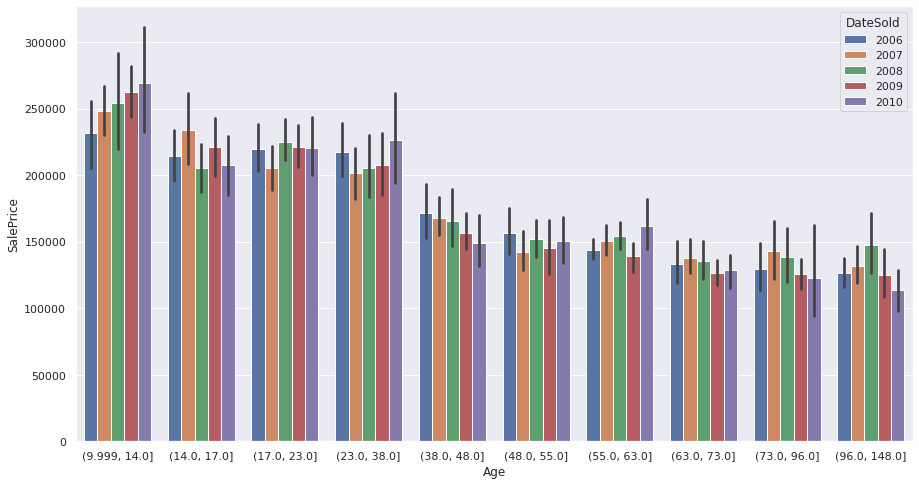

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(x = x, y = y, data = df, hue = df['DateSold'].dt.year)

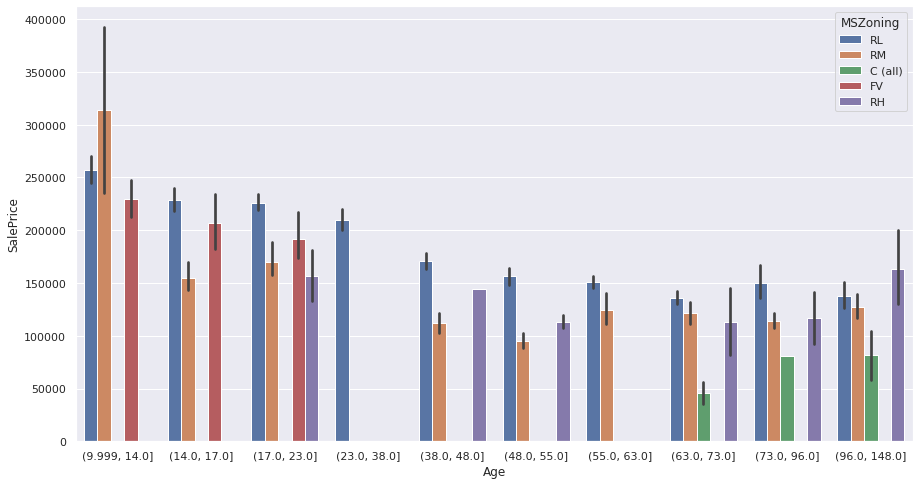

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(x = x, y = y, data = df, hue = 'MSZoning')

### Observations
1. Maximum sales is for buildings of 14 years or less.
2. Buildings of age 14 to 38 years have similar sale price.
3. Buildings of age 38 to 63 years have similar sale price.
4. Buildings older than 63 years have similar sale price.

In [ ]:
nobj = df.columns[df.dtypes!='O']
nobj = nobj.drop(['Id','SalePrice'])

In [ ]:
nobj

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'Age',
       'AgeRemod', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'AgeGarage', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'DateSold', 'PriceperSft', 'LWRatio'],
      dtype='object')

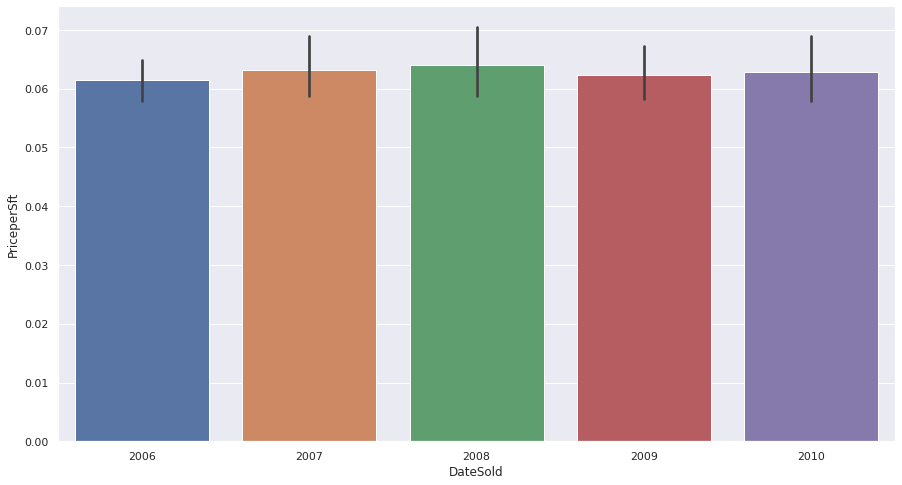

In [ ]:
# Check metrics for variance

plt.figure(figsize = (15,8))
sns.barplot(x = df['DateSold'].dt.year, y = 'PriceperSft', data = df)

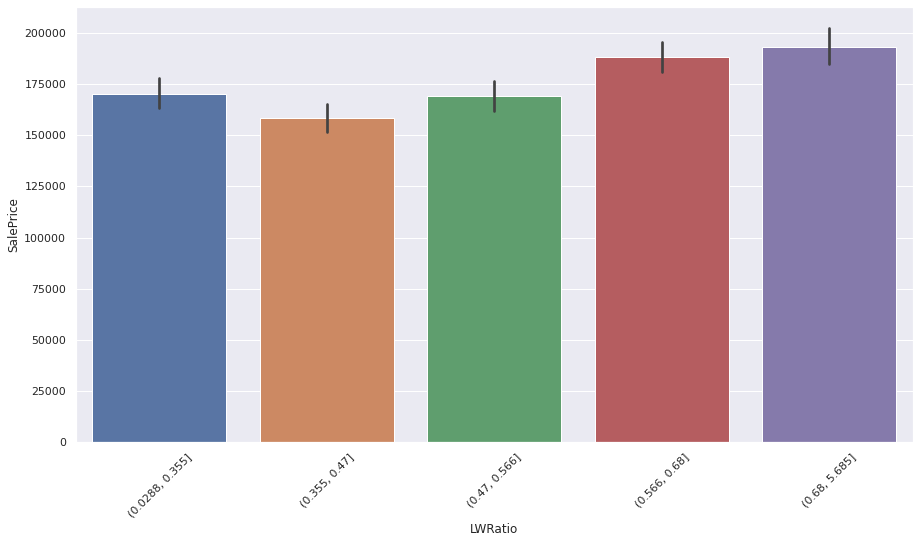

In [ ]:
plt.figure(figsize = (15,8))
plt.xticks(rotation = 45)
sns.barplot(x = pd.qcut(df['LWRatio'], q = 5), y = 'SalePrice', data = df)

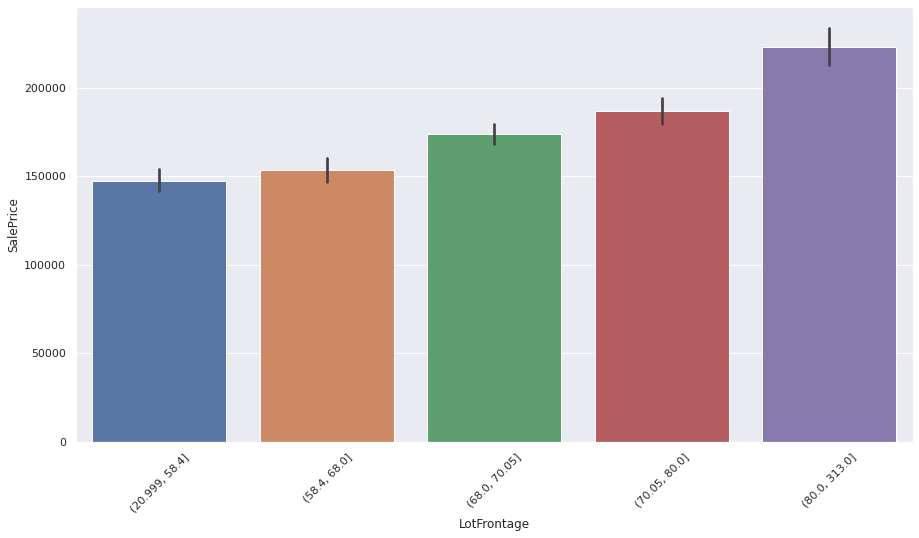

In [ ]:
plt.figure(figsize = (15,8))
plt.xticks(rotation = 45)
sns.barplot(x = pd.qcut(df['LotFrontage'], q = 5), y = 'SalePrice', data = df)

In [ ]:
nobj

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'Age',
       'AgeRemod', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'AgeGarage', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'DateSold', 'PriceperSft', 'LWRatio'],
      dtype='object')

## Skewed continuous variable columns treatment

In [56]:
# Transform columns with high skew

df_orig = df.copy()
df[logcols] = np.log(df[logcols])
df[sqrtcols] = np.sqrt(df[sqrtcols])
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Id             -0.001924
LotFrontage    -0.954219
LotArea        -0.152128
OverallQual     0.118781
OverallCond     0.665948
Age             0.594878
AgeRemod        0.483091
BsmtFinSF1     -0.040423
BsmtUnfSF       0.906259
1stFlrSF        0.033538
2ndFlrSF        0.760518
GrLivArea      -0.092290
BsmtFullBath    0.620219
FullBath       -0.022551
HalfBath        0.706305
BedroomAbvGr    0.231567
TotRmsAbvGrd    0.624132
Fireplaces      0.668935
AgeGarage       0.653187
GarageCars     -0.355639
GarageArea      0.149517
WoodDeckSF      0.503952
OpenPorchSF     0.620005
SalePrice       1.001684
PriceperSft    -0.008492
LWRatio        -0.654729
dtype: float64

## Dummy variable creation

In [57]:
df_post_trans = df.copy()

In [58]:
obj = df.columns[df.dtypes=='O'].to_list()
df = pd.get_dummies(data = df, columns=obj, drop_first = True)

In [59]:
df.shape

(1438, 194)

In [60]:
df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
LotFrontage,4.174387,4.382027,4.219508,4.094345,4.430817
LotArea,9.041922,9.169518,9.328123,9.164296,9.565214
OverallQual,7,6,7,7,8
OverallCond,5,8,5,5,5
...,...,...,...,...,...
SaleCondition_AdjLand,0,0,0,0,0
SaleCondition_Alloca,0,0,0,0,0
SaleCondition_Family,0,0,0,0,0
SaleCondition_Normal,1,1,1,0,1


In [61]:
df2 = df.copy()
corr_vals = df2[df2.columns[1:]].corr()['SalePrice'][:].sort_values(ascending = False)

In [62]:
corr_vals[
          (corr_vals>=0.5) |
          (corr_vals<=-0.5)
]

SalePrice           1.000000
OverallQual         0.796343
GrLivArea           0.687548
GarageCars          0.651158
GarageArea          0.626092
1stFlrSF            0.575440
FullBath            0.553524
ExterQual_Gd        0.535900
Foundation_PConc    0.516520
BsmtQual_TA        -0.529812
AgeRemod           -0.536864
KitchenQual_TA     -0.543933
GarageFinish_Unf   -0.548162
Age                -0.557339
ExterQual_TA       -0.609489
Name: SalePrice, dtype: float64

In [63]:
df[['OverallQual','SalePrice']].corr()

,OverallQual,SalePrice
OverallQual,1.000000,0.796343
SalePrice,0.796343,1.000000


## EDA Conclusion
1. Variables had skewed data.
2. Target variable had outliers.
3. Most variables correlate well with target variable.
4. Highest correlating variables (correlation >0.6) are overall quality, ground living area, Garage cars, Garage area and external quality of TA.

# Linear Regression

## Defining Models

In [64]:
# Preparing X and y

# Putting feature variable to X

X = df.drop(['Id','SalePrice','DateSold'], axis = 1)

# Putting response variable to y

y = df['SalePrice']

## Split Data

In [65]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df.drop(['Id','DateSold'], axis = 1), train_size = 0.7, random_state = 100)

## Feature Scaling

### Preparing Train and Test

In [66]:
train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'Age',
       'AgeRemod', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=192)

In [67]:
varcols = train.describe().T

In [68]:
fitcols = varcols[varcols['max']>1].index

In [69]:
fitcols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'Age',
       'AgeRemod', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'AgeGarage', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'LWRatio'],
      dtype='object')

In [70]:
fitcols = fitcols.drop('SalePrice')

In [71]:
fitcols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'Age',
       'AgeRemod', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'AgeGarage', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'LWRatio'],
      dtype='object')

In [72]:
train[fitcols].describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1006.0,4.199014,0.321824,3.044522,4.094345,4.249209,4.369448,5.746203
LotArea,1006.0,9.115587,0.520176,7.170120,8.935476,9.161413,9.347534,12.279532
OverallQual,1006.0,6.027833,1.319287,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1006.0,5.598410,1.098057,1.000000,5.000000,5.000000,6.000000,9.000000
Age,1006.0,48.756461,29.850362,11.000000,20.000000,48.000000,66.000000,145.000000
AgeRemod,1006.0,35.394632,20.623088,10.000000,17.000000,28.000000,54.000000,70.000000
BsmtFinSF1,1006.0,16.160571,12.884251,0.000000,0.000000,19.196349,26.485840,42.544095
BsmtUnfSF,1006.0,564.535785,441.445444,0.000000,212.000000,482.500000,815.750000,2153.000000
1stFlrSF,1006.0,6.997163,0.309141,5.811141,6.776221,6.983326,7.222201,7.971776
2ndFlrSF,1006.0,329.633201,417.120820,0.000000,0.000000,0.000000,703.750000,1523.000000


### Scale features

In [73]:
# Scaling features

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

y_train = train.pop('SalePrice')
X_train = train

y_test = test.pop('SalePrice')
X_test = test

X_train[fitcols] = scaler.fit_transform(X_train[fitcols])
X_test[fitcols] = scaler.transform(X_test[fitcols])

In [74]:
X_train[fitcols].describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1006.0,0.427323,0.119120,0.0,0.388581,0.445903,0.490408,1.0
LotArea,1006.0,0.380761,0.101807,0.0,0.345511,0.389730,0.426157,1.0
OverallQual,1006.0,0.558648,0.146587,0.0,0.444444,0.555556,0.666667,1.0
OverallCond,1006.0,0.574801,0.137257,0.0,0.500000,0.500000,0.625000,1.0
Age,1006.0,0.281765,0.222764,0.0,0.067164,0.276119,0.410448,1.0
AgeRemod,1006.0,0.423244,0.343718,0.0,0.116667,0.300000,0.733333,1.0
BsmtFinSF1,1006.0,0.379855,0.302845,0.0,0.000000,0.451211,0.622550,1.0
BsmtUnfSF,1006.0,0.262209,0.205037,0.0,0.098467,0.224106,0.378890,1.0
1stFlrSF,1006.0,0.548923,0.143079,0.0,0.446665,0.542519,0.653076,1.0
2ndFlrSF,1006.0,0.216437,0.273881,0.0,0.000000,0.000000,0.462081,1.0


In [75]:
X_test[fitcols].describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,432.0,0.425733,0.116566,0.000000,0.388581,0.445903,0.476078,1.000000
LotArea,432.0,0.371634,0.097429,0.032266,0.335012,0.381771,0.424912,0.762270
OverallQual,432.0,0.567387,0.152049,0.111111,0.444444,0.555556,0.666667,1.000000
OverallCond,432.0,0.567419,0.144421,0.125000,0.500000,0.500000,0.625000,1.000000
Age,432.0,0.291667,0.228848,-0.007463,0.067164,0.283582,0.427239,1.022388
AgeRemod,432.0,0.425154,0.345736,0.000000,0.100000,0.250000,0.733333,1.000000
BsmtFinSF1,432.0,0.385943,0.311610,0.000000,0.000000,0.470100,0.617873,1.765852
BsmtUnfSF,432.0,0.260572,0.199784,0.000000,0.109266,0.217836,0.360543,1.084998
1stFlrSF,432.0,0.551225,0.145913,0.167842,0.448378,0.546578,0.655100,1.223008
2ndFlrSF,432.0,0.238418,0.293968,0.000000,0.000000,0.000000,0.500164,1.193697


## Multicollinearity check and feature elimination

In [76]:
df[df.columns[1:]].corr()['SalePrice'][:].sort_values(ascending = False)

SalePrice           1.000000
OverallQual         0.796343
GrLivArea           0.687548
GarageCars          0.651158
GarageArea          0.626092
                      ...   
AgeRemod           -0.536864
KitchenQual_TA     -0.543933
GarageFinish_Unf   -0.548162
Age                -0.557339
ExterQual_TA       -0.609489
Name: SalePrice, Length: 192, dtype: float64

### Recursive Feature Elimination

In [77]:
dftrain = pd.DataFrame(X_train)
dftrain.dtypes

LotFrontage              float64
LotArea                  float64
OverallQual              float64
OverallCond              float64
Age                      float64
                          ...   
SaleCondition_AdjLand      uint8
SaleCondition_Alloca       uint8
SaleCondition_Family       uint8
SaleCondition_Normal       uint8
SaleCondition_Partial      uint8
Length: 191, dtype: object

In [78]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

rfe = RFE(estimator=LinearRegression(), n_features_to_select=30)
rfe = rfe.fit(X_train, y_train)

In [79]:
X_train.columns[rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'Age',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'PriceperSft', 'LWRatio', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_BrDale', 'Neighborhood_MeadowV',
       'Neighborhood_NoRidge', 'Exterior1st_AsphShn', 'Exterior1st_CemntBd',
       'Exterior2nd_CmentBd', 'ExterCond_Fa', 'Foundation_Slab',
       'Foundation_Stone', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA',
       'HeatingQC_Po', 'SaleType_ConLD'],
      dtype='object')

In [80]:
X_train.columns[~rfe.support_]

Index(['AgeRemod', 'BsmtFinSF1', 'BsmtUnfSF', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'Fireplaces', 'AgeGarage', 'GarageCars', 'GarageArea',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=161)

In [81]:
X_train_new = X_train[X_train.columns[rfe.support_]]

### VIF Check

In [82]:
# Import library for vif

from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["features"] = X_train_new.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]

# View vif

vif.round(1).sort_values(by = 'VIF Factor', ascending = False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,features,VIF Factor
11,LWRatio,1349.1
0,LotFrontage,1029.8
1,LotArea,287.0
14,MSZoning_RL,37.4
15,MSZoning_RM,27.8
7,GrLivArea,21.6
21,Exterior2nd_CmentBd,20.6
20,Exterior1st_CemntBd,20.3
10,PriceperSft,16.7
6,2ndFlrSF,16.7


### Remove features with high VIF

In [88]:
dropcols = ['LWRatio','LotFrontage','LotArea']
X_train_new1 = X_train_new.drop(dropcols, axis = 1)

In [89]:
X_test_new = X_test[X_train_new1.columns]

In [90]:
X_train_new = X_train_new1

In [91]:
# import linear regression

from sklearn.linear_model import LinearRegression

# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train_new, y_train)

LinearRegression()

In [92]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

4637.643865859369
[144860.12862285  56516.33163263 -54999.09905576 191978.86490448
  76527.99448299  19019.12794878 -60129.3563086    1954.33621444
   2105.99463231  10880.57738606  -3207.59891566   8083.5470942
  -6905.3831852   -3535.99545426 -13942.2265424   34296.44481047
 -63674.99282383 -17299.52166929  37388.35141451   9079.80318944
 -14322.98941915  11192.29871093 -47610.56242423 -41893.16242872
 -45421.73358898  -1636.92005964  12548.33697853]


In [93]:
from sklearn.metrics import r2_score, mean_squared_error

In [94]:
y_pred_train = lm.predict(X_train_new)
y_pred_test = lm.predict(X_test_new)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 train score', r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 test score', r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1', rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2', rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse train', mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse test', mse_test_lr)
metric.append(mse_test_lr**0.5)

r2 train score 0.8416463465115782
r2 test score 0.7610059525606133
rss1 709396492767.8958
rss2 492982773287.06506
mse train 705165499.7692801
mse test 1141163827.0533915


## Ridge and Lasso Regression

### Ridge Regression

In [95]:
# Import libraries

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [96]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1.0}


In [97]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 0.01
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[144728.07572638  56500.00725298 -54979.22534097 190661.70639908
  75786.86561005  20592.74868387 -60043.1625636    2040.22413041
   2092.22598039  10881.04576169  -3181.56569541   8116.58947827
  -6892.1151896   -3652.30147681 -13984.58816779  34370.10030633
 -63086.18999121 -17008.26667114  37111.75495784   9021.34547155
 -14320.57899618  11223.02736031 -47619.25088316 -41902.21796491
 -45450.04389946  -1562.4180912   12492.79248363]


In [98]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 train', r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 test', r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1', rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2', rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse train', mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse test', mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2 train 0.8416455681021382
r2 test 0.761181999125731
rss1 709399979905.1641
rss2 492619634853.9985
mse train 705168966.108513
mse test 1140323228.8287


### Lasso Regression

In [99]:
# import lasso

from sklearn.linear_model import Lasso

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [100]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 50}


In [101]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =10

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=10)

In [102]:
lasso.coef_

array([145981.18780575,  55500.5704194 , -54085.56543498, 191332.30006198,
        76061.20490789,  19211.18414023, -57184.09083943,    292.89277456,
         1894.45978875,   8943.70500951,  -4306.25357653,   6445.31465752,
        -8658.84432895,  -2596.42236072, -12892.58467094,  33808.2768639 ,
       -53587.00464651,  -7380.28534418,  27136.82513607,   8511.52233776,
       -13353.85397851,   7394.71414621, -46973.26805112, -41650.81166782,
       -45402.02197227,     -0.        ,  10015.11094472])

In [103]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 train', r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 test', r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1', rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2', rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse train', mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse test', mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2 train 0.8415360142684979
r2 test 0.7621619036585376
rss1 709890761795.2037
rss2 490598345791.2988
mse train 705656820.8699838
mse test 1135644318.96134


In [104]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.416463e-01,8.416456e-01,8.415360e-01
1,R2 Score (Test),7.610060e-01,7.611820e-01,7.621619e-01
2,RSS (Train),7.093965e+11,7.094000e+11,7.098908e+11
3,RSS (Test),4.929828e+11,4.926196e+11,4.905983e+11
4,MSE (Train),2.655495e+04,2.655502e+04,2.656420e+04
5,MSE (Test),3.378112e+04,3.376867e+04,3.369932e+04


### Conclusion

1. The lasso regression has performed slightly better than other types with the following observations: -

    >a. The R2 score for test is better for lasso.

    >b. The RSS score for test is better for lasso.

    >c. The MSE test score is better for lasso.

### Show changes in coefficient

In [105]:
betas = pd.DataFrame(index=X_train_new.columns)

In [106]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [107]:
pd.set_option('display.max_rows', None)
betas

,Linear,Ridge,Lasso
OverallQual,144860.128623,144728.075726,145981.187806
OverallCond,56516.331633,56500.007253,55500.570419
Age,-54999.099056,-54979.225341,-54085.565435
1stFlrSF,191978.864904,190661.706399,191332.300062
2ndFlrSF,76527.994483,75786.865610,76061.204908
GrLivArea,19019.127949,20592.748684,19211.184140
BedroomAbvGr,-60129.356309,-60043.162564,-57184.090839
TotRmsAbvGrd,1954.336214,2040.224130,292.892775
PriceperSft,2105.994632,2092.225980,1894.459789
MSZoning_FV,10880.577386,10881.045762,8943.705010


### Significant values

In [108]:
betas['Lasso'].sort_values()

BedroomAbvGr            -57184.090839
Age                     -54085.565435
Exterior1st_AsphShn     -53587.004647
BsmtQual_Fa             -46973.268051
BsmtQual_TA             -45402.021972
BsmtQual_Gd             -41650.811668
Foundation_Slab         -13353.853979
Neighborhood_MeadowV    -12892.584671
MSZoning_RM              -8658.844329
Exterior1st_CemntBd      -7380.285344
MSZoning_RH              -4306.253577
Neighborhood_BrDale      -2596.422361
HeatingQC_Po                -0.000000
TotRmsAbvGrd               292.892775
PriceperSft               1894.459789
MSZoning_RL               6445.314658
Foundation_Stone          7394.714146
ExterCond_Fa              8511.522338
MSZoning_FV               8943.705010
SaleType_ConLD           10015.110945
GrLivArea                19211.184140
Exterior2nd_CmentBd      27136.825136
Neighborhood_NoRidge     33808.276864
OverallCond              55500.570419
2ndFlrSF                 76061.204908
OverallQual             145981.187806
1stFlrSF    

In [109]:
betas['Ridge'].sort_values()

Exterior1st_AsphShn     -63086.189991
BedroomAbvGr            -60043.162564
Age                     -54979.225341
BsmtQual_Fa             -47619.250883
BsmtQual_TA             -45450.043899
BsmtQual_Gd             -41902.217965
Exterior1st_CemntBd     -17008.266671
Foundation_Slab         -14320.578996
Neighborhood_MeadowV    -13984.588168
MSZoning_RM              -6892.115190
Neighborhood_BrDale      -3652.301477
MSZoning_RH              -3181.565695
HeatingQC_Po             -1562.418091
TotRmsAbvGrd              2040.224130
PriceperSft               2092.225980
MSZoning_RL               8116.589478
ExterCond_Fa              9021.345472
MSZoning_FV              10881.045762
Foundation_Stone         11223.027360
SaleType_ConLD           12492.792484
GrLivArea                20592.748684
Neighborhood_NoRidge     34370.100306
Exterior2nd_CmentBd      37111.754958
OverallCond              56500.007253
2ndFlrSF                 75786.865610
OverallQual             144728.075726
1stFlrSF    

In [110]:
betas['Linear'].sort_values()

Exterior1st_AsphShn     -63674.992824
BedroomAbvGr            -60129.356309
Age                     -54999.099056
BsmtQual_Fa             -47610.562424
BsmtQual_TA             -45421.733589
BsmtQual_Gd             -41893.162429
Exterior1st_CemntBd     -17299.521669
Foundation_Slab         -14322.989419
Neighborhood_MeadowV    -13942.226542
MSZoning_RM              -6905.383185
Neighborhood_BrDale      -3535.995454
MSZoning_RH              -3207.598916
HeatingQC_Po             -1636.920060
TotRmsAbvGrd              1954.336214
PriceperSft               2105.994632
MSZoning_RL               8083.547094
ExterCond_Fa              9079.803189
MSZoning_FV              10880.577386
Foundation_Stone         11192.298711
SaleType_ConLD           12548.336979
GrLivArea                19019.127949
Neighborhood_NoRidge     34296.444810
Exterior2nd_CmentBd      37388.351415
OverallCond              56516.331633
2ndFlrSF                 76527.994483
OverallQual             144860.128623
1stFlrSF    

## Features distinguishing decision for house purchase are

The significant features for lasso regression are: -

Positively influencing factors: -

1. Lot area.
2. First floor square feet area.

Negatively Influencing factors: -
1. Price per square feet.
2. Ground Living area.
3. Bedroom above ground.

The significant features from Ridge and linear Regressions are: -

Positively influencing factors: -

1. Lot area.
2. Lot frontage.

Negatively influencing factors: -
1. Length Width Ratio.
2. Price per square feet.
3. Ground living area.

